# Basic Data Science in Python - Handin 2
## Leihui Li, leihui@mpe.au.dk ##

This handin is indiviual and mandatory to pass the course.

Hand in this .ipynb file and the compiled pdf, no later than 25/10 kl 9:30.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.cluster import DBSCAN, KMeans, Birch, OPTICS
from sklearn.mixture import GaussianMixture

### Exercise 3: Different Size Clusters (Handin)

Use k-Means to cluster the below dataset. What happens? Which method should you use instead? Use the method you deem most fitting to cluster the dataset.

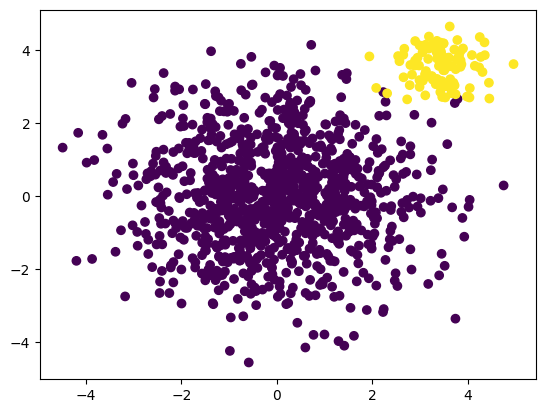

In [2]:
clusters_std = [1.5, 0.5]
X, y = datasets.make_blobs(
    n_samples=[1000, 100],
    centers=[[0.0, 0.0], [3.5, 3.5]],
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)
plt.scatter(*X.T, c=y)

## 0. K-Means

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10, 'random_state': None, 'tol': 0.0001, 'verbose': 0}


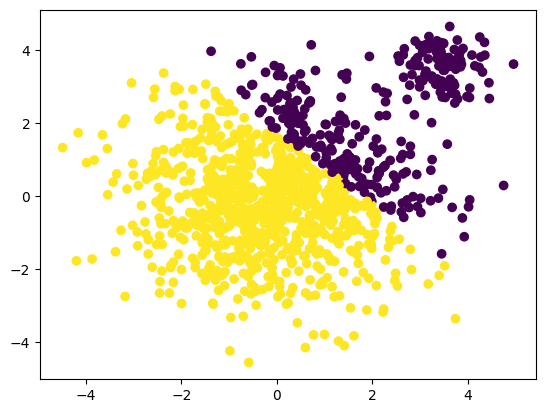

In [3]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    max_iter=100
)
print (kmeans.get_params())
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()

It looks like the result of the clustering provided by K-Means is not correct because the distribution of these blob points confuses the K-means.

In [4]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# silhouette, purity
def get_metrics(_X, _Y, _labels):
    return {
        'silhouette': np.round(metrics.silhouette_score(_X, _labels, metric='euclidean'), 6), 
        'purity': np.round(purity_score(_Y, _labels), 6),
        'F1': metrics.f1_score(_Y, _labels, average='weighted'),
        'Recall': metrics.precision_score(_Y, _labels, average='micro') 
    }

score_table = []
score_table.append(get_metrics(X, y, kmeans.labels_))

## 1. OPTICS

{'algorithm': 'auto', 'cluster_method': 'xi', 'eps': None, 'leaf_size': 30, 'max_eps': inf, 'memory': None, 'metric': 'minkowski', 'metric_params': None, 'min_cluster_size': 0.2, 'min_samples': 2, 'n_jobs': None, 'p': 2, 'predecessor_correction': True, 'xi': 0.1}


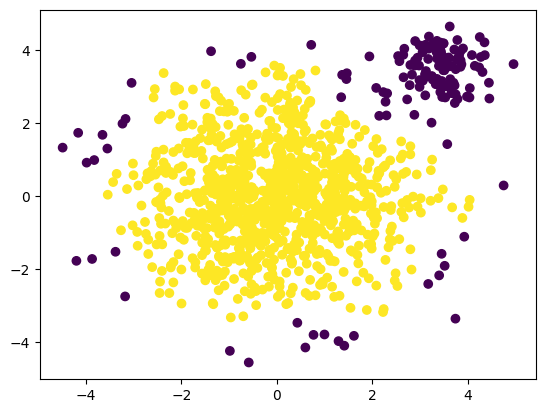

{'silhouette': 0.465096, 'purity': 0.958182, 'F1': 0.8876895877919418, 'Recall': 0.8672727272727273}


In [5]:
OPTICS_cluster = OPTICS(min_samples=2, xi=0.1, min_cluster_size=0.2).fit(X)
print (OPTICS_cluster.get_params())
plt.scatter(X[:,0], X[:,1], c=OPTICS_cluster.labels_)
plt.show()
res = get_metrics(X, y, OPTICS_cluster.labels_)
print (res)
score_table.append(res)

## 2. Birch

{'branching_factor': 50, 'compute_labels': True, 'copy': True, 'n_clusters': 2, 'threshold': 1.5}


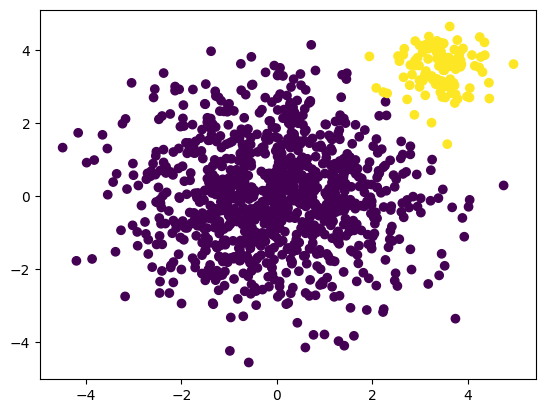

{'silhouette': 0.498341, 'purity': 0.994545, 'F1': 0.9946166832359392, 'Recall': 0.9945454545454545}


In [6]:
birch_cluster = Birch(n_clusters=2, branching_factor=50, threshold=1.5).fit(X)
print (birch_cluster.get_params())
plt.scatter(X[:,0], X[:,1], c=birch_cluster.labels_)
plt.show()
res = get_metrics(X, y, birch_cluster.labels_)
print (res)
score_table.append(res)

## 3. GaussianMixture

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 2, 'n_init': 1, 'precisions_init': None, 'random_state': 42, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[[-0.03368799 -0.01120141]
 [ 3.460787    3.5155775 ]]


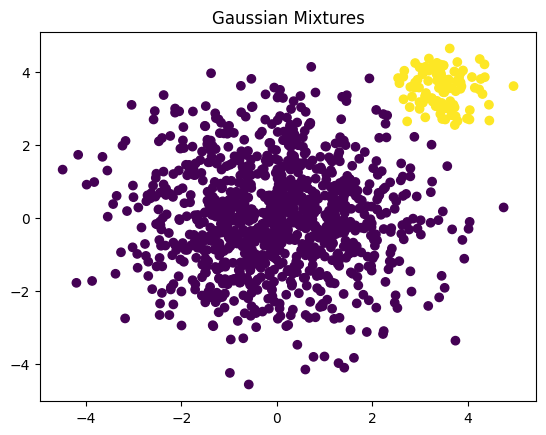

{'silhouette': 0.497082, 'purity': 0.995455, 'F1': 0.9954442605102201, 'Recall': 0.9954545454545455}


In [7]:
GM_clustering = GaussianMixture(n_components=2, random_state=42).fit(X)
print (GM_clustering.get_params())
centers = GM_clustering.means_
print(centers) # should be [0,0] and [3.5, 3.5]

GM_labels = GM_clustering.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = GM_labels)
plt.title('Gaussian Mixtures')
plt.show()
res = get_metrics(X, y, GM_labels)
print (res)
score_table.append(res)

In [8]:
# get_metrics(X, y, labels)

## 4. DBSCAN

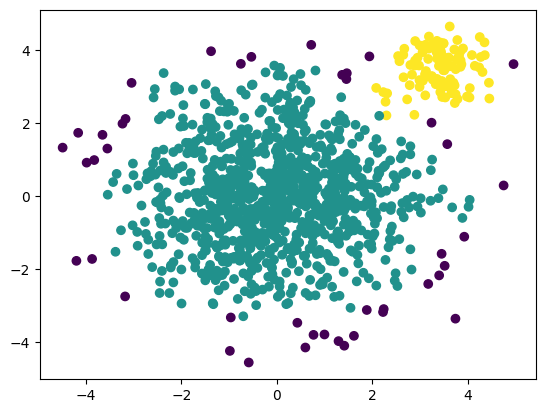

{'silhouette': 0.408802, 'purity': 0.992727, 'F1': 0.9745571737981605, 'Recall': 0.9554545454545454}


In [9]:
y_pred = DBSCAN(eps = 0.5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()
res = get_metrics(X, y, y_pred)
print (res)
score_table.append(res)

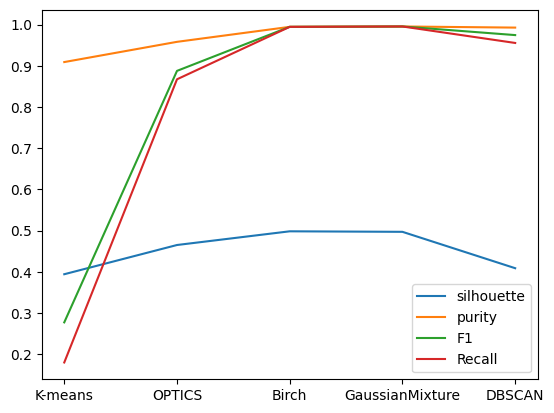

In [10]:
silhouette_list, purity_list, F1_list, Recall_list = [], [], [], []
for index, item in enumerate(score_table):
    silhouette_list.append(item['silhouette'])
    purity_list.append(item['purity'])
    F1_list.append(item['F1'])
    Recall_list.append(item['Recall'])

#for index,item in enumerate(score_table):
plt.plot(silhouette_list, label = 'silhouette')
plt.plot(purity_list, label = 'purity')
plt.plot(F1_list, label = 'F1')
plt.plot(Recall_list, label = 'Recall')
plt.xticks(range(len(score_table)), ['K-means', 'OPTICS', 'Birch', 'GaussianMixture', 'DBSCAN'])
plt.legend()
plt.show()
# print (score_table)

Based on the evaluation result including silhouette, purity, F1 and recall, we could say that **Birch** and **GaussianMixture** have the best clustering performance on our blob dataset.